# Building Neural Networks with Keras

In this lab you will explore how to use the Keras library to build neural networks.

[Keras](https://keras.io/) is a user-friendly neural network library.  It builds on top of lower-level libraries such as Tensorflow, PyTorch, and JAX to make the process of designing and training neural networks easier.

Here we create a simple multi-layer perceptron (MLP) on a toy dataset to demonstrate the basic features of Keras.

Note that we have selected the GPU runtime in `Runtime > Change runtime type` to speed up neural network training.

In [1]:
import keras
from keras import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense
import glob
import imageio
from sklearn.neighbors import KNeighborsClassifier

/Users/jventu09/Library/CloudStorage/OneDrive-CalPoly/Teaching/EE 428/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


To create the moons dataset I use the scikit-learn `make_moons` function.  I included noise to make the problem a little more interesting.

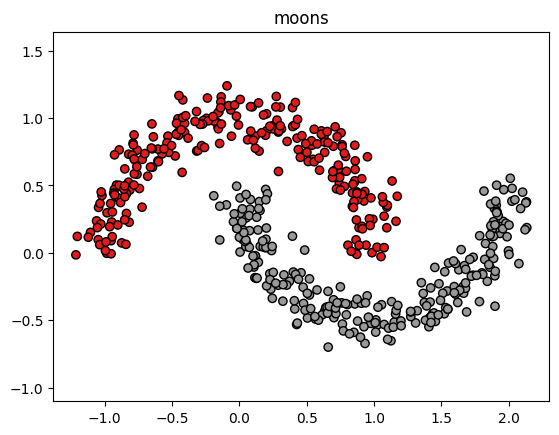

In [2]:
from sklearn.datasets import make_moons
import numpy as np
from matplotlib import pyplot as plt

x,y = make_moons(n_samples=500,noise=0.1)
x = x.astype('float32')

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.axis('equal')
plt.title('moons')
plt.show()

## Neural network setup

To create a feed-forward neural network using Keras, we can use the Sequential class which accepts a list of layers as its argument.

The `Input` layer specifies the shape of the input, not including the batch dimension (the first dimension).

A `Dense` layer implements the linear transformation optionally combined with a non-linear activation:

$$x' = \sigma(Wx+b)$$

The first argument is the number of hidden units, i.e., the width.  ReLU is the standard choice for activation but there are many others to choose from.

Since this is a binary classification problem, we only need to output a single probability value (the probability of the point belonging to the positive class).  We use the sigmoid activation to produce a probability value between 0 and 1.

In [3]:
model = Sequential([
    Input(x.shape[1:]),
    Dense(10,activation='relu',name='h1'),
    Dense(10,activation='relu',name='h2'),
    Dense(1,activation='sigmoid',name='z')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ z (Dense)                       │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Now we specify some hyperparameters: the learning rate, batch size, and number of epochs.

In [4]:
epochs = 500
learning_rate = 0.1
batch_size= 128

Before we can train the model we need to select an optimizer and compile the model with a loss function.

As a starting point we use the `SGD` optimizer which implements stochastic gradient descent with momentum.  `Adam` is the modern optimizer of choice, but there are many other optimizers to choose from as well.

We need to use the `binary_crossentropy` loss since we have a binary classification problem.

We can also tell Keras to compute other metrics to monitor during training such as accuracy.  These are not included in the loss function but only shown to help gauge model performance during training.

In [5]:
opt = SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

To fit the model we call `model.fit` and pass in the data and training settings.

In [6]:
history = model.fit(x,y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=True)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4919 - loss: 0.7006  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5065 - loss: 0.6799  
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5905 - loss: 0.6615  
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6287 - loss: 0.6514  
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6823 - loss: 0.6323  
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.7366 - loss: 0.6200
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7685 - loss: 0.6082
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8018 - loss: 0.5950
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8051 - loss: 0.5831  
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8382 - loss: 0.5607  
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8358 - loss: 0.5501
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy:

Once training is done we can plot the accuracy over time.

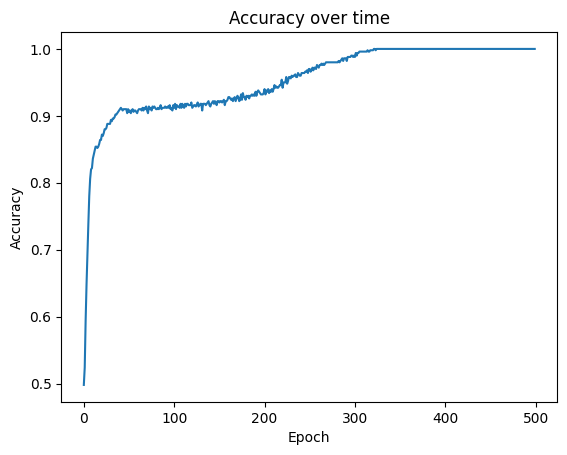

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over time')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 255us/step


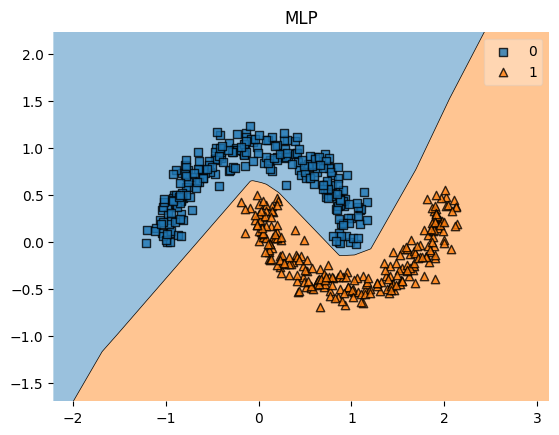

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y, clf=model)
plt.title("MLP")
plt.show()

## Exercises

Let's try our image classification experiment again and try to outperform the k-nearest neighbors classifier we used previously.

In [9]:
label_names = ['buildings','forest','glacier','mountain','sea','street']

In [10]:
def load_split(split):
    images = []
    labels = []
    for i,label in enumerate(label_names):
        image_paths = sorted(glob.glob(f'archive/seg_{split}/seg_{split}/{label}/*.jpg'))
        for path in image_paths:
            image = imageio.imread(path)
            if len(image.shape)<3:
                continue
            if image.shape[0]!=150 or image.shape[1]!=150 or image.shape[2]!=3:
                continue
            images.append(image)
            labels.append(i)
    return np.array(images), np.array(labels)

train_images, train_labels = load_split('train')
test_images, test_labels = load_split('test')

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_93712/1112897.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)


In [11]:
mobilenet = keras.applications.MobileNetV2(include_top=False,pooling='avg')

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_93712/568530069.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = keras.applications.MobileNetV2(include_top=False,pooling='avg')


In [12]:
train_descriptors = mobilenet.predict(
    keras.applications.mobilenet_v2.preprocess_input(train_images),
    verbose=True)
test_descriptors = mobilenet.predict(
    keras.applications.mobilenet_v2.preprocess_input(test_images),
    verbose=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step


In [13]:
model = KNeighborsClassifier(10).fit(train_descriptors,train_labels)
model.score(test_descriptors,test_labels)

0.8927497494153024

Create an MLP to classify the image descriptors.  Can you beat the test accuracy of the k-Nearest Neighbors model?

Here are some tips and tricks to try:
* Try Adam optimizer instead of SGD
* Try a low learning rate like 3e-4
* Include a validation split to monitor overfitting
* Use `ModelCheckpoint` with `save_weights_only=True` and `save_best_only=True` to save the model weights with the best validation accuracy seen during training.  You will then need to do `model.load_weights` after training to reload the best weights.
* Try various forms of regularization (e.g., the `kernel_regularizer` argument to `Dense`)